In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
f_13 = pd.read_csv('hofmeister_data_2019_br13.txt', sep='\t')
f_14 = pd.read_csv('hofmeister_data_2019_br14.txt', sep='\t')
print(f_13)

    13.1 13.2 13.3 13.5
0     RR   RR   RR   RR
1     RR   RA   RR   RR
2     RR   RR   RR   RA
3     RR   RR   RR   RA
4     RR   RR   RR   RA
..   ...  ...  ...  ...
113   RR   RR   RA   RR
114   RR   RR   RA   RR
115   RA   RR   RR   RR
116   RR   RR   RA   RR
117   RR   RR   RA   RR

[118 rows x 4 columns]


In [3]:
br_13 = np.array(f_13).T
br_14 = np.array(f_14).T
print(br_13)
print(np.shape(br_14))

[['RR' 'RR' 'RR' 'RR' 'RR' 'RR' 'RA' 'RR' 'RR' 'RR' 'RR' 'RR' 'RR' 'RR'
  'RR' 'RA' 'RR' 'RA' 'RA' 'RA' 'RR' 'RA' 'RR' 'RR' 'RA' 'RR' 'RA' 'RR'
  'RA' 'RR' 'RA' 'RR' 'RA' 'RA' 'RR' 'RR' 'RR' 'RR' 'RR' 'RA' 'RR' 'RR'
  'RR' 'RA' 'RR' 'RR' 'RR' 'RR' 'RR' 'RR' 'RR' 'RR' 'RR' 'RA' 'RA' 'RR'
  'RA' 'RR' 'RR' 'RR' 'RR' 'RA' 'RR' 'RR' 'RA' 'RA' 'RR' 'RR' 'RA' 'RR'
  'RR' 'RA' 'RR' 'RR' 'RR' 'RR' 'RR' 'RA' 'RR' 'RR' 'RR' 'RA' 'RR' 'RA'
  'RR' 'RR' 'RR' 'RR' 'RR' 'RR' 'RR' 'RR' 'RR' 'RR' 'RA' 'RR' 'RR' 'RR'
  'RR' 'RR' 'RR' 'RA' 'RR' 'RR' 'RR' 'RR' 'RR' 'RA' 'RR' 'RR' 'RR' 'RR'
  'RR' 'RR' 'RR' 'RA' 'RR' 'RR']
 ['RR' 'RA' 'RR' 'RR' 'RR' 'RA' 'RR' 'RR' 'RA' 'RA' 'RA' 'RR' 'RR' 'RA'
  'RR' 'RA' 'RR' 'RR' 'RR' 'RA' 'RA' 'RR' 'RA' 'RR' 'RR' 'RA' 'RR' 'RR'
  'RR' 'RR' 'RR' 'RA' 'RR' 'RR' 'RR' 'RR' 'RR' 'RA' 'RA' 'RR' 'RA' 'RR'
  'RA' 'RA' 'RR' 'RR' 'RR' 'RR' 'RR' 'RR' 'RR' 'RA' 'RA' 'RA' 'RA' 'RA'
  'RR' 'RA' 'RA' 'RR' 'RA' 'RR' 'RA' 'RA' 'RR' 'RR' 'RR' 'RA' 'RA' 'RR'
  'RA' 'RR' 'RR' 'RA' 'RA' 'RR'

In [8]:
# Function to count 'RA' values in each comparable row without double-counting
def count_ra_values(row1, row2):
    #count = np.sum((row1 == 'RA') & (row2 != 'RA')) + np.sum((row1 != 'RA') & (row2 == 'RA'))
    count = np.sum(row1 == 'RA') + np.sum(row2 == 'RA') - np.sum((row1 == 'RA') & (row2 == 'RA'))   
    return count

def count(array):
    num_rows = array.shape[0]
    ra_counts = []
    # Compare each row with every other row
    for i in range(num_rows):
        for j in range(i + 1, num_rows):
            result = count_ra_values(array[i], array[j])
            ra_counts.append(result)
    return ra_counts

# Function to count 'RA' values in each row
def count_cross_ra_values(row):
    return np.sum(row == 'RA')

def cross_count(arr1, arr2):
    # Number of rows
    num_rows_array1 = arr1.shape[0]
    num_rows_array2 = arr2.shape[0]

    # List to store the results
    ra_counts = []

    # Count 'RA' values for each pair of rows
    for i in range(num_rows_array1):
        count1 = count_cross_ra_values(arr1[i])
        for j in range(num_rows_array2):
            count2 = count_cross_ra_values(arr2[j])
            total_count = count1 + count2
            ra_counts.append(total_count)
            print(f"Total 'RA' count for pair ({i+1}, {j+1}): {total_count}")
    return ra_counts


num_of_mutation_br13 = count(br_13)
num_of_mutation_br14 = count(br_14)
num_of_mutation_in_cross_pairs = cross_count(br_13, br_14)

Total 'RA' count for pair (1, 1): 42
Total 'RA' count for pair (1, 2): 81
Total 'RA' count for pair (1, 3): 71
Total 'RA' count for pair (1, 4): 73
Total 'RA' count for pair (2, 1): 55
Total 'RA' count for pair (2, 2): 94
Total 'RA' count for pair (2, 3): 84
Total 'RA' count for pair (2, 4): 86
Total 'RA' count for pair (3, 1): 39
Total 'RA' count for pair (3, 2): 78
Total 'RA' count for pair (3, 3): 68
Total 'RA' count for pair (3, 4): 70
Total 'RA' count for pair (4, 1): 38
Total 'RA' count for pair (4, 2): 77
Total 'RA' count for pair (4, 3): 67
Total 'RA' count for pair (4, 4): 69


In [9]:
print(num_of_mutation_br13, '\n')
print(num_of_mutation_br14)
print(num_of_mutation_in_cross_pairs)

[64, 52, 54, 64, 67, 51] 

[65, 55, 56, 90, 92, 75]
[42, 81, 71, 73, 55, 94, 84, 86, 39, 78, 68, 70, 38, 77, 67, 69]


In [15]:
pairs = num_of_mutation_br13 + num_of_mutation_br14 + num_of_mutation_in_cross_pairs
ages = [83, 140, 191, 139, 190, 191, 144, 181, 181, 117, 117, 82, 615, 615, 652, 652, 614, 614, 651, 651, 615, 615, 652, 652, 584, 584, 621, 621]

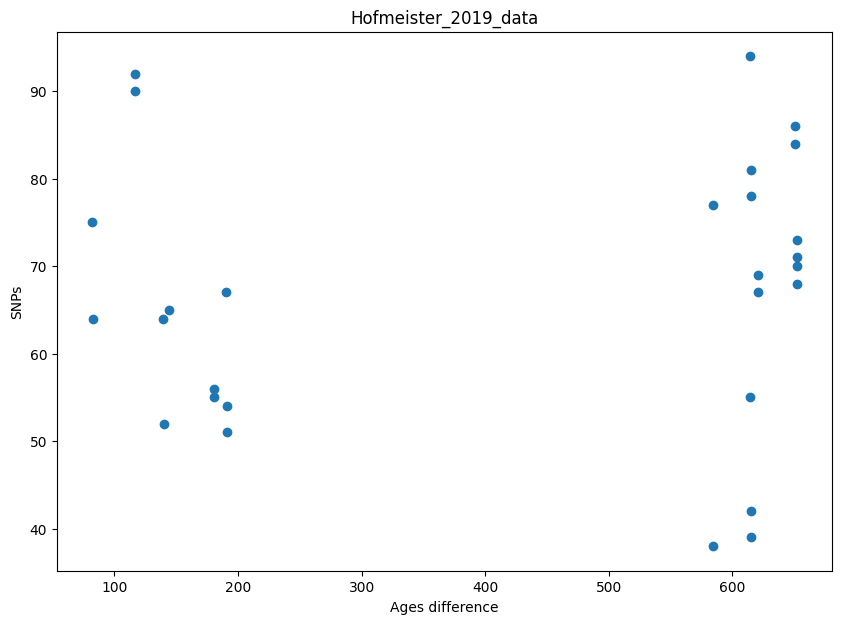

In [16]:
x_val = np.array(ages)
y_val = np.array(pairs)
sorted_indices = np.argsort(x_val)
sorted_data = y_val[sorted_indices]
sorted_ages = x_val[sorted_indices]

#plotting:
fig, ax = plt.subplots(figsize=(10,7))

graph = ax.scatter(x_val, y_val)

#points_to_annotate = [(1, 'Br. 13.5'), (2, 'Br. 14.5'), (3, 'Br. 14.4'), (4, 'Br. 13.3' ), (5, 'Br. 13.2'), (6, 'Br. 14.3'), (7, 'Br. 13.1'), (8, 'Br. 14.2')]

#for point in points_to_annotate:
#    ax.annotate(point[1], (x[point[0] - 1], y[point[0] - 1]), textcoords="offset points", xytext=(0, 5), ha='center')
ax.set_xlabel('Ages difference')
ax.set_ylabel('SNPs')
ax.set_title('Hofmeister_2019_data')
plt.show()


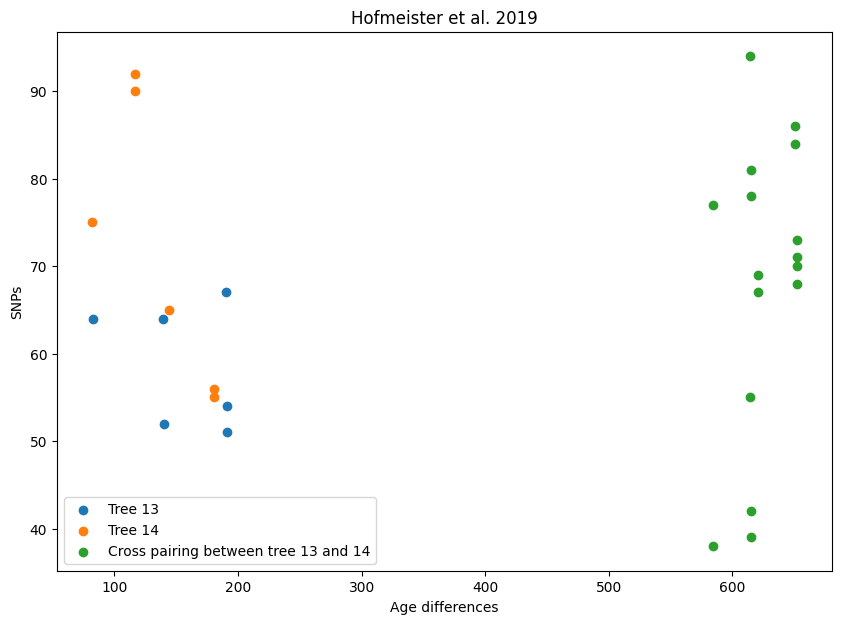

In [23]:
tr_13 = np.array(num_of_mutation_br13)
tr_13_ages = np.array([83, 140, 191, 139, 190, 191])

tr_14 = np.array(num_of_mutation_br14)
tr_14_ages = np.array([144, 181, 181, 117, 117, 82])

cross = np.array(num_of_mutation_in_cross_pairs)
cross_ages = np.array([615, 615, 652, 652, 614, 614, 651, 651, 615, 615, 652, 652, 584, 584, 621, 621])

#sorting:
sorted_indices = np.argsort(tr_13_ages)
sorted_data_13 = tr_13[sorted_indices]
sorted_ages_13 = tr_13_ages[sorted_indices]

sorted_indices = np.argsort(tr_14_ages)
sorted_data_14 = tr_14[sorted_indices]
sorted_ages_14 = tr_14_ages[sorted_indices]

sorted_indices = np.argsort(cross_ages)
sorted_data_cross = cross[sorted_indices]
sorted_ages_cross = cross_ages[sorted_indices]

fig, ax = plt.subplots(figsize=(10,7))

graph1 = ax.scatter(sorted_ages_13, sorted_data_13, label = 'Tree 13')
graph2 = ax.scatter(sorted_ages_14, sorted_data_14, label = 'Tree 14')
graph3 = ax.scatter(sorted_ages_cross, sorted_data_cross, label = 'Cross pairing between tree 13 and 14')
#points_to_annotate = [(1, 'Br. 13.5'), (2, 'Br. 14.5'), (3, 'Br. 14.4'), (4, 'Br. 13.3' ), (5, 'Br. 13.2'), (6, 'Br. 14.3'), (7, 'Br. 13.1'), (8, 'Br. 14.2')]

#for point in points_to_annotate:
#    ax.annotate(point[1], (x[point[0] - 1], y[point[0] - 1]), textcoords="offset points", xytext=(0, 5), ha='center')
ax.set_xlabel('Age differences')
ax.set_ylabel('SNPs')
ax.set_title('Hofmeister et al. 2019')
plt.legend()
plt.show()

In [14]:
# data from the 2020 article
x_values = ['[1,2,3,4,5,6,7,8]',
            '[1,0,0,0,0,0,0,0]', '[0,1,0,0,0,0,0,0]', '[0,0,1,0,0,0,0,0]', '[0,0,0,1,0,0,0,0]',
            '[0,0,0,0,1,0,0,0]', '[0,0,0,0,0,1,0,0]', '[0,0,0,0,0,0,1,0]', '[0,0,0,0,0,0,0,1]',
            '[1,1,0,0,0,0,0,0]', '[1,0,1,0,0,0,0,0]', '[1,0,0,1,0,0,0,0]', '[0,1,1,0,0,0,0,0]', '[0,1,0,1,0,0,0,0]', '[0,0,1,1,0,0,0,0]',
            '[0,0,0,0,1,1,0,0]', '[0,0,0,0,1,0,1,0]', '[0,0,0,0,1,0,0,1]', '[0,0,0,0,0,1,1,0]', '[0,0,0,0,0,1,0,1]', '[0,0,0,0,0,0,1,1]',
            '[1,1,1,0,0,0,0,0]', '[1,1,0,1,0,0,0,0]', '[1,0,1,1,0,0,0,0]', '[0,1,1,1,0,0,0,0]',
            '[0,0,0,0,1,1,1,0]', '[0,0,0,0,1,1,0,1]', '[0,0,0,0,1,0,1,1]', '[0,0,0,0,0,1,1,1]',
            '[1,1,1,1,0,0,0,0]',
            '[0,0,0,0,1,1,1,1]']
y_values = [0, 12, 47, 30, 31, 25, 21, 34, 22, 0, 0, 1, 1, 1, 8, 0, 0, 0, 1, 0, 4, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0 ]

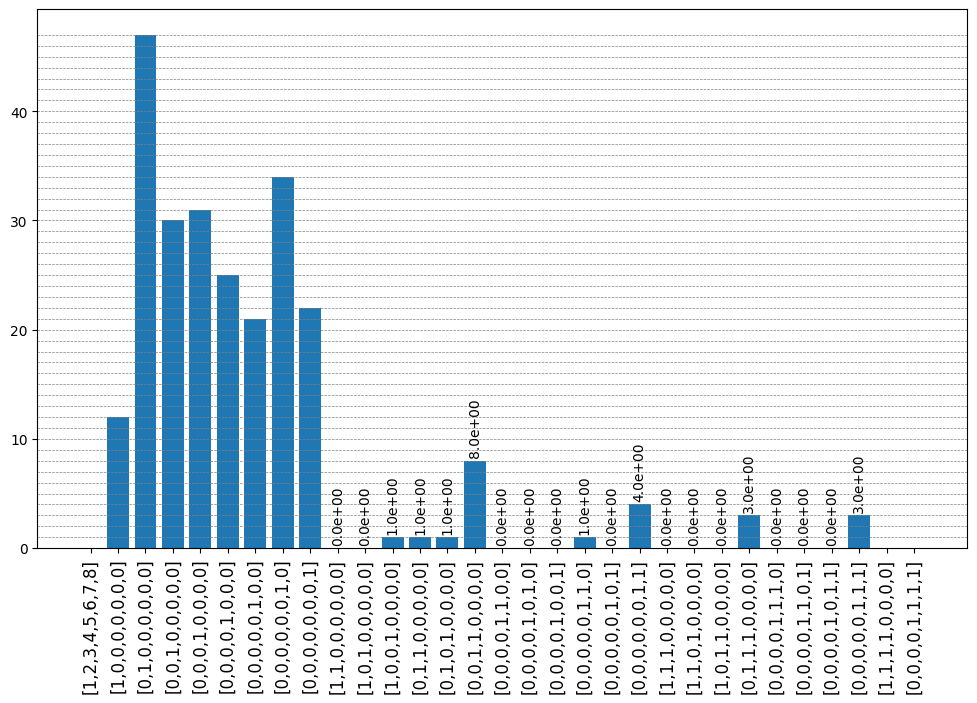

In [15]:
fig, ax = plt.subplots(figsize = (12,7))
ax.bar(x_values, y_values)
annotated_indices = [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
for i in annotated_indices:
    freq = y_values[i]
    ax.text(i, freq+0.3, f'{freq:.1e}', ha='center', va='bottom', fontsize=10, color='black', rotation = 90)
for y_value in range(1, math.ceil(max(y_values))+1):
    ax.axhline(y=y_value, color='gray', linestyle='--', linewidth=0.5)
plt.xticks(rotation = 90, fontsize = 12)
plt.show()